In [131]:
import pandas as pd
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [2]:
#load the Disneyland Reviews file
df = pd.read_csv('DisneylandReviews.csv')

In [3]:
#call the first five row to ensure the data loaded properly
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
#the number of records
df.count()

Review_ID            42656
Rating               42656
Year_Month           42656
Reviewer_Location    42656
Review_Text          42656
Branch               42656
dtype: int64

In [5]:
#the number of distinct records in each column
df.nunique()

Review_ID            42636
Rating                   5
Year_Month             112
Reviewer_Location      162
Review_Text          42632
Branch                   3
dtype: int64

In [6]:
#drop duplicates from the Review_Text
df.drop_duplicates(subset='Review_Text', inplace=True, ignore_index=True)

In [7]:
#recheck the number of records after duplicates have been removed
df.count()

Review_ID            42632
Rating               42632
Year_Month           42632
Reviewer_Location    42632
Review_Text          42632
Branch               42632
dtype: int64

In [8]:
#the number of distinct records in each column
df.nunique()

Review_ID            42624
Rating                   5
Year_Month             112
Reviewer_Location      162
Review_Text          42632
Branch                   3
dtype: int64

In [9]:
#Determine if the duplicates in Review_ID are actually duplicated records   
df[df['Review_ID'].duplicated(keep=False)].sort_values('Review_ID')

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9165,121615136,5,2011-12,Singapore,"What's there not to like about Disneyland, esp...",Disneyland_HongKong
9175,121615136,5,2011-12,Singapore,"What's there not to like about Disneyland, esp...",Disneyland_HongKong
9164,121615246,4,2011-12,India,I visited Hong Kong Disneyland with my family ...,Disneyland_HongKong
9174,121615246,4,2011-12,India,I visited Hong Kong Disneyland with my family ...,Disneyland_HongKong
7938,164830205,3,2012-7,United States,"If you've visited DisneyWorld in Orlando, your...",Disneyland_HongKong
7947,164830205,3,2012-7,United States,"If you've visited DisneyWorld in Orlando, your...",Disneyland_HongKong
24004,166730734,3,2013-3,Australia,I say that I was a little disappointed by Disn...,Disneyland_California
24010,166730734,3,2013-3,Australia,I say that I was a little disappointed by Disn...,Disneyland_California
24003,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California
24009,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California


In [10]:
#drop duplicates from the Review_ID
df.drop_duplicates(subset='Review_ID', inplace=True, ignore_index=True)

In [11]:
#recheck the number of records after duplicates have been removed
df.count()

Review_ID            42624
Rating               42624
Year_Month           42624
Reviewer_Location    42624
Review_Text          42624
Branch               42624
dtype: int64

In [12]:
#number of records with missing data
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [13]:
df[['Year_Month', 'Reviewer_Location', 'Branch']].describe()

,Year_Month,Reviewer_Location,Branch
count,42624,42624,42624
unique,112,162,3
top,missing,United States,Disneyland_California
freq,2610,14536,19395


In [14]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [15]:
#find the number of missing values in each column
print(df[df['Review_ID'] == 'missing']['Review_ID'].count())
print(df[df['Rating'] == 'missing']['Review_ID'].count())
print(df[df['Year_Month'] == 'missing']['Review_ID'].count())
print(df[df['Reviewer_Location'] == 'missing']['Review_ID'].count())
print(df[df['Review_Text'] == 'missing']['Review_ID'].count())
print(df[df['Branch'] == 'missing']['Review_ID'].count())

0
0
2610
0
0
0


In [16]:
df.groupby('Branch')['Review_ID'].count()

Branch
Disneyland_California    19395
Disneyland_HongKong       9602
Disneyland_Paris         13627
Name: Review_ID, dtype: int64

In [17]:
df[df['Year_Month'] == 'missing'].groupby('Branch')['Review_ID'].count()

Branch
Disneyland_California    1203
Disneyland_HongKong       471
Disneyland_Paris          936
Name: Review_ID, dtype: int64

In [18]:
#dates not missing in each branch
print(1204/19460)
print(473/9620)
print(936/13630)
print((1204+473+936)/42656)

0.0618705035971223
0.04916839916839917
0.06867204695524579
0.06125750187546887


In [19]:
#remove records where date is missing
df_cleaned = df[df['Year_Month'] != 'missing'].reset_index(drop=True)

In [20]:
df_cleaned.count()

Review_ID            40014
Rating               40014
Year_Month           40014
Reviewer_Location    40014
Review_Text          40014
Branch               40014
dtype: int64

In [21]:
df_cleaned['Branch'] = df_cleaned['Branch'].str.replace('Disneyland_', '')

In [22]:
df_cleaned.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


In [23]:
df_cleaned['Year'] = ''

In [24]:
for i in range(len(df_cleaned)):
    df_cleaned['Year'][i] = df_cleaned['Year_Month'][i][0:4]

<ipython-input-24-ef56037adcd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'][i] = df_cleaned['Year_Month'][i][0:4]


In [25]:
df_cleaned.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019


In [26]:
df_Branch = df_cleaned.groupby('Branch')['Review_ID'].count()
df_Branch

Branch
California    18192
HongKong       9131
Paris         12691
Name: Review_ID, dtype: int64

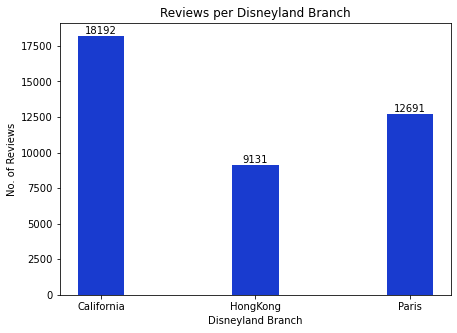

In [27]:
plt.figure(figsize = (7, 5))
plt.bar(df_Branch.index, df_Branch, color='#193bcf', width = .3)
plt.xlabel('Disneyland Branch')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Disneyland Branch')

for i in range(len(df_Branch.index)):
    plt.text(i, df_Branch[i], df_Branch[i], ha='center', va = 'bottom')

plt.show;

In [28]:
df_Rating = df_cleaned.groupby('Rating')['Review_ID'].count()
df_Rating

Rating
1     1338
2     1928
3     4778
4    10076
5    21894
Name: Review_ID, dtype: int64

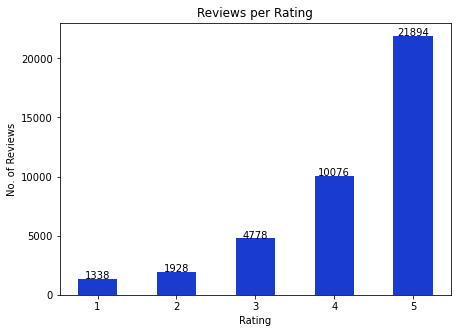

In [29]:
plt.figure(figsize = (7, 5))
plt.bar(df_Rating.index, df_Rating, color='#193bcf', width = .5)
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Rating')

for i in range(1, 6):
    plt.text(i, df_Rating[i], df_Rating[i], ha='center')

plt.show;

In [30]:
df_Year = df_cleaned.groupby('Year')['Review_ID'].count()
df_Year

Year
2010     143
2011    1975
2012    4339
2013    4707
2014    5297
2015    6978
2016    6598
2017    5195
2018    3996
2019     786
Name: Review_ID, dtype: int64

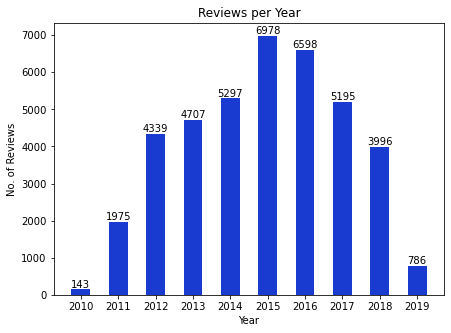

In [31]:
plt.figure(figsize = (7, 5))
plt.bar(df_Year.index, df_Year, color='#193bcf', width = .5)
plt.xlabel('Year')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Year')

for i in range(len(df_Year.index)):
    plt.text(i, df_Year[i], df_Year[i], ha='center', va = 'bottom')

plt.show;

In [32]:
df_Location = df_cleaned.groupby('Reviewer_Location')['Review_ID'].count()
df_Location

Reviewer_Location
Afghanistan             2
Albania                 6
Algeria                 2
Andorra                 1
Antigua and Barbuda     1
                       ..
Venezuela               3
Vietnam                55
Zambia                  3
Zimbabwe                2
�land Islands           1
Name: Review_ID, Length: 162, dtype: int64

In [33]:
df_cleaned

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019
...,...,...,...,...,...,...,...
40009,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Paris,2011
40010,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Paris,2011
40011,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Paris,2010
40012,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Paris,2010


In [34]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [35]:
n_components = 5
n_top_words = 15

In [36]:
sw = stopwords.words('english')

In [37]:
sw.append('park')
sw.append('disneyland')
sw.append('disney')


In [38]:
vect = CountVectorizer(max_df = 0.95, min_df = 2,
                      stop_words = sw)

tf = vect.fit_transform(df_cleaned['Review_Text'])

In [39]:
lda = LatentDirichletAllocation(n_components=n_components, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [40]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [41]:
print("\nTopics in LDA model:")
tf_feature_names = vect.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: staff paris people would children us experience even many like one closed year cast queue
Topic #1: mountain ride space world pirates thunder star jones indiana closed california big like magic caribbean
Topic #2: rides time day great go place kids visit good really see fun one much food
Topic #3: get day rides time fast pass one ride go minutes wait hotel line would people
Topic #4: show ride water train mickey main land parade coaster also castle small good food take



In [42]:
# Creat Document - Topic Matrix
lda_output = lda.transform(tf)
lda_output

array([[0.00685807, 0.00681696, 0.50374229, 0.00678475, 0.47579792],
       [0.1422872 , 0.24900476, 0.39005423, 0.00211969, 0.21653412],
       [0.00253675, 0.00251865, 0.74743834, 0.24497388, 0.00253238],
       ...,
       [0.29096239, 0.06810685, 0.05898316, 0.46624427, 0.11570334],
       [0.32510102, 0.10049603, 0.17711496, 0.24001287, 0.15727513],
       [0.00348917, 0.05216198, 0.00354715, 0.58891718, 0.35188452]])

In [43]:
# column names
themeNames = ["Theme_" + str(i) for i in range (lda.n_components)]
themeNames

['Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4']

In [44]:
# index names
idNames = [i for i in range(len(df_cleaned))]

In [48]:
# Make the pandas dataframe

df_themes = pd.DataFrame(np.round(lda_output, 2), columns = themeNames, index = idNames)
df_themes


,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4
0,0.01,0.01,0.50,0.01,0.48
1,0.14,0.25,0.39,0.00,0.22
2,0.00,0.00,0.75,0.24,0.00
3,0.00,0.39,0.41,0.12,0.07
4,0.01,0.01,0.95,0.01,0.01
...,...,...,...,...,...
40009,0.17,0.03,0.00,0.79,0.01
40010,0.07,0.04,0.26,0.44,0.18
40011,0.29,0.07,0.06,0.47,0.12
40012,0.33,0.10,0.18,0.24,0.16


In [49]:
# Get dominant topic for each document
dominant_theme = np.argmax(df_themes.values, axis = 1)
df_themes['dominant_theme'] = dominant_theme

In [50]:
df_themes

,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme
0,0.01,0.01,0.50,0.01,0.48,2
1,0.14,0.25,0.39,0.00,0.22,2
2,0.00,0.00,0.75,0.24,0.00,2
3,0.00,0.39,0.41,0.12,0.07,2
4,0.01,0.01,0.95,0.01,0.01,2
...,...,...,...,...,...,...
40009,0.17,0.03,0.00,0.79,0.01,3
40010,0.07,0.04,0.26,0.44,0.18,3
40011,0.29,0.07,0.06,0.47,0.12,3
40012,0.33,0.10,0.18,0.24,0.16,0


In [54]:
theme_breakdown = df_themes.groupby('dominant_theme')['dominant_theme'].count()
theme_breakdown

dominant_theme
0     3431
1     1521
2    25806
3     7993
4     1263
Name: dominant_theme, dtype: int64

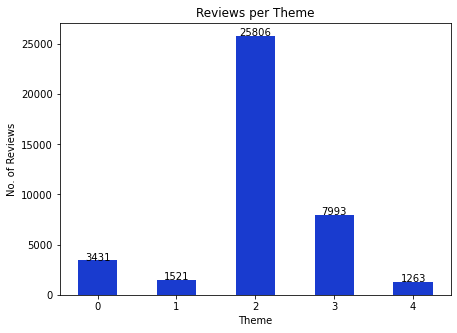

In [58]:
plt.figure(figsize = (7, 5))
plt.bar(theme_breakdown.index, theme_breakdown, color='#193bcf', width = .5)
plt.xlabel('Theme')
plt.ylabel('No. of Reviews')
plt.title('Reviews per Theme')

for i in range(0, 5):
    plt.text(i, theme_breakdown[i], theme_breakdown[i], ha='center')

plt.show;

In [60]:
df_cleaned = pd.concat([df_cleaned, df_themes], axis = 1)

In [61]:
df_cleaned

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,0.01,0.01,0.50,0.01,0.48,2
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,0.14,0.25,0.39,0.00,0.22,2
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,0.00,0.00,0.75,0.24,0.00,2
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,0.00,0.39,0.41,0.12,0.07,2
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,0.01,0.01,0.95,0.01,0.01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40009,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Paris,2011,0.17,0.03,0.00,0.79,0.01,3
40010,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Paris,2011,0.07,0.04,0.26,0.44,0.18,3
40011,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Paris,2010,0.29,0.07,0.06,0.47,0.12,3
40012,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Paris,2010,0.33,0.10,0.18,0.24,0.16,0


In [63]:
sia = SentimentIntensityAnalyzer()

In [64]:
df_cleaned['pos'] = ''
df_cleaned['neu'] = ''
df_cleaned['neg'] = ''

In [66]:
for i in range(len(df_cleaned)):
    sentiment = sia.polarity_scores(df_cleaned['Review_Text'][i])
    df_cleaned['pos'][i] = sentiment['pos']
    df_cleaned['neu'][i] = sentiment['neu']
    df_cleaned['neg'][i] = sentiment['neg']

<ipython-input-66-cf2b7d63290f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pos'][i] = sentiment['pos']
<ipython-input-66-cf2b7d63290f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['neu'][i] = sentiment['neu']
<ipython-input-66-cf2b7d63290f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['neg'][i] = sentiment['neg']


In [69]:
df_cleaned.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neu,neg
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,0.01,0.01,0.50,0.01,0.48,2,0.113,0.887,0.0
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,0.14,0.25,0.39,0.00,0.22,2,0.231,0.73,0.04
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,0.00,0.00,0.75,0.24,0.00,2,0.235,0.742,0.024
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,0.00,0.39,0.41,0.12,0.07,2,0.16,0.76,0.08
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,0.01,0.01,0.95,0.01,0.01,2,0.101,0.899,0.0


In [124]:
model_years = ['2012', '2013', '2014', '2015', '2016', '2017']

In [125]:
df_cleaned.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch', 'Year', 'Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neu', 'neg'],
      dtype='object')

In [126]:
model_df = df_cleaned[df_cleaned['Year'].isin(model_years)][['Rating', 'Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neu', 'neg']]
model_df.head()

,Rating,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neu,neg
489,4,0.14,0.01,0.83,0.01,0.01,2,0.305,0.695,0.0
515,5,0.02,0.02,0.94,0.02,0.02,2,0.233,0.767,0.0
523,5,0.01,0.01,0.94,0.01,0.01,2,0.286,0.714,0.0
532,2,0.27,0.00,0.40,0.10,0.24,2,0.124,0.764,0.112
543,3,0.02,0.21,0.73,0.02,0.02,2,0.262,0.738,0.0


In [127]:
model_df = model_df.reset_index(drop=True)

In [128]:
model_df.head()

,Rating,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neu,neg
0,4,0.14,0.01,0.83,0.01,0.01,2,0.305,0.695,0.0
1,5,0.02,0.02,0.94,0.02,0.02,2,0.233,0.767,0.0
2,5,0.01,0.01,0.94,0.01,0.01,2,0.286,0.714,0.0
3,2,0.27,0.00,0.40,0.10,0.24,2,0.124,0.764,0.112
4,3,0.02,0.21,0.73,0.02,0.02,2,0.262,0.738,0.0


In [129]:
y = model_df['Rating']
x = model_df[['Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neu', 'neg']]

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [132]:
knn = KNeighborsClassifier(n_neighbors=3)

In [133]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [134]:
knn.score(x_test, y_test)

0.4866374754642911

In [136]:
model_df_2 = df_cleaned[df_cleaned['Year'] == '2018'][['Rating', 'Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neu', 'neg']].reset_index(drop=True)
model_df_2.head()

,Rating,Theme_0,Theme_1,Theme_2,Theme_3,Theme_4,dominant_theme,pos,neu,neg
0,5,0.01,0.01,0.89,0.06,0.04,2,0.412,0.588,0.0
1,5,0.01,0.01,0.47,0.11,0.40,2,0.221,0.779,0.0
2,5,0.01,0.46,0.43,0.01,0.10,1,0.257,0.694,0.048
3,4,0.00,0.20,0.14,0.39,0.27,3,0.147,0.825,0.027
4,5,0.05,0.01,0.91,0.01,0.01,2,0.0,1.0,0.0


In [137]:
y_2 = model_df_2['Rating']
x_2 = model_df_2[['Theme_0', 'Theme_1', 'Theme_2', 'Theme_3', 'Theme_4',
       'dominant_theme', 'pos', 'neu', 'neg']]

In [138]:
knn.score(x_2, y_2)

0.48323323323323325